# K-Nearest Neighbor(KNN)
* 개념 소개
    * 새로운 데이터가 들어왔을 때, 기존 데이터와 비교하여 가장 가까운 K개의 이웃의 정보를 기반으로 새로운 데이터를 예측하는 알고리즘이다.
    * 가까운 이웃 중에 임의의 K개를 선택한다. 이웃 7개를 선택할 경우, 노란색이 2개, 초록색이
    3개, 파란색이 2개가 있다. 이 중 초록색이 제일 많으므로 새로운 데이터의 클래스를
    초록색으로 예측한다.
    * K가 작을 경우 데이터의 지역적 특성을 지나치게 반영하여 과적합이 발생한다. 반대로 K가 너무 클 경우 모델이 지나치게 정규화되어 과소적합이 발생할 수 있다.
    * 적절한 K를 선택하기 위해서는 트레인셋과 테스트셋을 나누고, K를 바꿔가면서 실험을 거쳐 최적의 K를 찾아야 한다.

* 거리 측정 방법
    * KNN에서 거리 측정 방법은 또 하나의 하이퍼 파라미터 거리를 측정하는 방법애 따라 결과가 크게 달라진다.

    * 거리 측정 방법
        * Euclidean Distance
        * Manhatan Distance
    
    * Euclidean Distance(유클리디안 거리)
        * 일반적으로 가장 많이 사용되는 거리 측정 방법으로 두 데이터 사이의 직선 최단거리를 구한다.
        * A 지점에서 B 지점까지 직선을 그으면 최단거리를 구할 수 있다.
    * Manhatan Distance(맨해튼 거리)
        * A에서 B까지 각 좌표축 방향으로만 이동해서 거리를 구하는 방법이다.
        * 맨해튼 거리는 두 점 좌표간의 절대값 차이를 합해서 구한다.

* 데이터 스케일링
    * KNN 알고리즘으로 학습하기 전에는 변수의 범위(Scale)을 축소해야 한다. 변수마다 측정 범위가 다를 경우에 범위가 큰   변수가 모델에 과도하게 큰 영향을 미치고, 범위가 작은 변수는 무시될 수 있기 때문이다.
    * 데이터의 값 범위를 변환하는 것을 스케일링이라고 하며 자주 사용되는 스케일링 방법은 다음과 같다.
        * ```MinMaxScaler``` - 모든 변수의 값을 0에서 1 사이로 조정한다.
        * ```StandardScaler``` - 평균을 0, 표준편차를 1로 변수를 조정한다.

### KNN 모델의 특징
* KNN의 특징은 학습이 따로 필요 없다는 것이다.
* 새로운 데이터가 주어지면 그때 기존 데이터에서 가까운 이웃을 뽑고 예측한다.
* 장점
    * 데이터가 복잡하고 이해하기 힘들더라도 클래스 간 비슷한 경향을 보이면 결과가 좋다.
    * 노이즈 데이터의 영향을 크게 받지 않는다.(Robust)
    * 비모수적 방법이기 때문에 데이터가 어떤 분포여도 상관 없이 적용할 수 있다.
    * 분류 뿐만 아니라 회귀 문제에도 KNN 방법론을 적용할 수 있다.

* 단점
    * 새로운 데이터와 모든 관측치의 거리를 측정하므로, 데이터의 양이 많아질수록 거리를 측정한느 시간이 길어 진다.
    * 어떤 분석에 어떤 K가 적절한지 알 수 없으므로 최적의 K를 선택하기 어렵다.


In [260]:
# Scikit-learn으로 실습
# iris 데이터

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
dataset = load_iris()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
x_train,x_test,y_train,y_test = train_test_split(data, dataset.target, random_state=42)

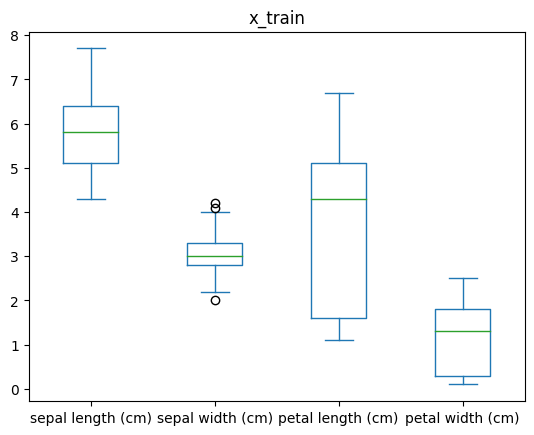

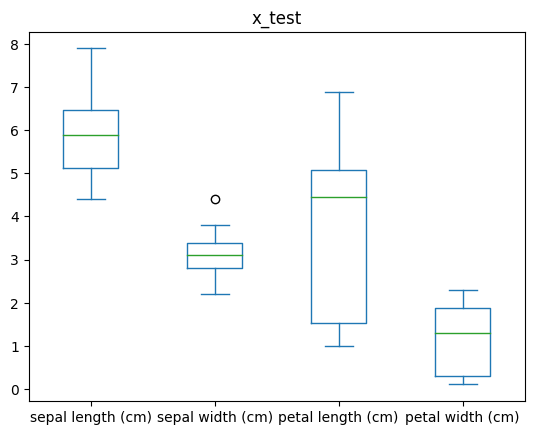

In [261]:
# pandas의 시각화 기능으로 박스 플롯을 그려 스케일 확인
import matplotlib.pyplot as plt
x_train.plot(kind='box')
plt.title('x_train')
plt.show()

x_test.plot(kind='box')
plt.title('x_test')
plt.show()

In [262]:
# 학습데이터 전처리
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x_train_scaled = mms.fit_transform(x_train)
x_test_scaled = mms.fit_transform(x_test)

print('x_train_scaled: ',x_train_scaled)
print('x_test_scaled: ', x_test_scaled)

x_train_scaled:  [[0.20588235 0.72727273 0.05357143 0.04166667]
 [0.26470588 0.95454545 0.07142857 0.        ]
 [0.44117647 0.31818182 0.71428571 0.75      ]
 [0.5        0.63636364 0.60714286 0.625     ]
 [0.70588235 0.5        0.64285714 0.58333333]
 [0.32352941 0.86363636 0.03571429 0.125     ]
 [0.32352941 0.77272727 0.07142857 0.04166667]
 [0.35294118 0.18181818 0.46428571 0.375     ]
 [0.58823529 0.36363636 0.71428571 0.58333333]
 [0.61764706 0.5        0.78571429 0.70833333]
 [0.67647059 0.45454545 0.58928571 0.54166667]
 [0.85294118 0.72727273 0.89285714 1.        ]
 [0.41176471 0.40909091 0.55357143 0.5       ]
 [0.97058824 0.45454545 0.98214286 0.83333333]
 [0.38235294 0.45454545 0.60714286 0.58333333]
 [0.23529412 0.68181818 0.05357143 0.04166667]
 [1.         0.36363636 1.         0.79166667]
 [0.44117647 0.31818182 0.53571429 0.375     ]
 [0.26470588 0.63636364 0.05357143 0.04166667]
 [0.20588235 0.68181818 0.03571429 0.08333333]
 [0.23529412 0.81818182 0.14285714 0.125   

In [263]:
# 모델 생성 및 학습
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train_scaled, y_train)

#모델 예측 및 평가
from sklearn.metrics import accuracy_score
pred = model.predict(x_test_scaled)
accuracy_score(y_test, pred)

0.9736842105263158

### KNeighborsClassifier 파라메터
* n_neighbors: 분류 시 고려할 인접 샘플 수 (가장 가까운 이웃을 몇개를 고를지에 대한 파라미터) default=5
* weights: 'distance'-인접한 샘플의 거리에 따라 다른 가중치 부여(가까울수록 큰 가중치) default='uniform'
* metric : 거리계산의 척도(minkowski, euclidean, manhantan 등), default='minkowski' , 'p'라는 매개 변수를 추가사용
* n_jobs : 사용할 코어의 갯수, -1이면 전부 사용

In [264]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=5, random_state=1, shuffle=True)
estimator = KNeighborsClassifier()
params = {'n_neighbors':[5,10,11,12,14,16,18], 'p':[1,2],'weights':['uniform','distance']}


gridknn = GridSearchCV(estimator=estimator, param_grid=params,
                        cv=cv, verbose=-1, n_jobs=-1, refit=True)

gridknn.fit(x_train, y_train)

print("Best Estimator:\n", gridknn.best_estimator_)
print()
print("Best Params:\n", gridknn.best_params_)
print()
print("Best Score:\n", gridknn.best_score_)
print()


Best Estimator:
 KNeighborsClassifier(n_neighbors=14, weights='distance')

Best Params:
 {'n_neighbors': 14, 'p': 2, 'weights': 'distance'}

Best Score:
 0.9735177865612649



### 농구선수 포지션 예측 실습

In [265]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
np.random.seed(5)

In [266]:
train = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_test.csv")

print(train)
print('------------------------')
print(test)

                 Player Pos   3P  TRB  BLK
0      Denzel Valentine  SG  1.3  2.6  0.1
1           Kyle Korver  SG  2.4  2.8  0.3
2          Troy Daniels  SG  2.1  1.5  0.1
3          Tim Hardaway  SG  1.9  2.8  0.2
4        Dewayne Dedmon   C  0.0  6.5  0.8
..                  ...  ..  ...  ...  ...
75       Victor Oladipo  SG  1.9  4.3  0.3
76  Willie Cauley-Stein   C  0.0  4.5  0.6
77          Brook Lopez   C  1.8  5.4  1.7
78      Josh Richardson  SG  1.4  3.2  0.7
79         Lou Williams  SG  2.0  2.5  0.2

[80 rows x 5 columns]
------------------------
                  Player Pos   3P   TRB  BLK
0           JaVale McGee   C  0.0   3.2  0.9
1          Manu Ginobili  SG  1.3   2.3  0.2
2           Nene Hilario   C  0.0   4.2  0.6
3          Evan Fournier  SG  1.9   3.1  0.1
4   Georgios Papagiannis   C  0.0   3.9  0.8
5          Anthony Davis   C  0.5  11.8  2.2
6            Tarik Black   C  0.0   5.1  0.7
7         Jamal Crawford  SG  1.4   1.6  0.2
8        Jordan Clarkson  SG  1

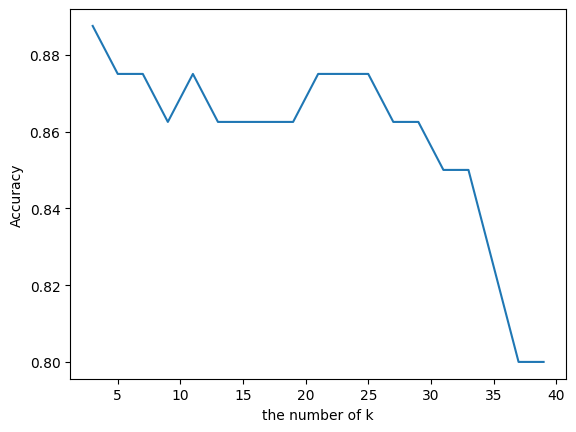

The best number of k:3


In [267]:
# 최적의 k 찾기 (cross validation)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
max_k_range = train.shape[0] // 2
k_list = []
for i in range(3, max_k_range, 2):
    k_list.append(i)

cross_validation_scores = []

x_train = train[['3P','BLK','TRB']]
y_train = train[['Pos']]

#10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    cross_validation_scores.append(scores.mean())
cross_validation_scores

plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

#find best k
cvs = cross_validation_scores
k = k_list[cvs.index(max(cross_validation_scores))]
print('The best number of k:' + str(k))

In [268]:
#2개의 특징으로 예측하기 (3점슛, 블로킹)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=k)

#select data features
x_train = train[['3P','BLK']]

#select target value
y_train = train[['Pos']]

#setup knn using train data
knn.fit(x_train, y_train.values.ravel())

# select data feature to be used for prediction
x_test = test[['3P','BLK']]

# select target value
y_test = test[['Pos']]

#test
pred = knn.predict(x_test)
pred


array(['C', 'SG', 'C', 'SG', 'C', 'C', 'C', 'SG', 'SG', 'C', 'SG', 'C',
       'SG', 'C', 'C', 'SG', 'SG', 'C', 'SG', 'C'], dtype=object)

In [269]:
# check ground_truth with knn prediction
comparison = pd.DataFrame({'prediction':pred, 'ground_truth':y_test.values.ravel()})
comparison

,prediction,ground_truth
0,C,C
1,SG,SG
2,C,C
3,SG,SG
4,C,C
5,C,C
6,C,C
7,SG,SG
8,SG,SG
9,C,C


In [270]:
#check accuracy
print('accuracy:'+str(accuracy_score(y_test.values.ravel(), pred)))

accuracy:1.0


In [271]:
#3개의 특징으로 예측하기 (3점슛, 블로킹, 리바운드)
knn = KNeighborsClassifier(n_neighbors=k)

# select data features to be used in train
x_train = train[['3P', 'BLK', 'TRB']]

# select target
y_train = train[['Pos']]

# build knn model
knn.fit(x_train, y_train.values.ravel())

# select features to be used for prediction
x_test = test[['3P', 'BLK', 'TRB']]

# select target
y_test = test[['Pos']]

# test
pred = knn.predict(x_test)
pred

array(['C', 'SG', 'C', 'SG', 'C', 'C', 'C', 'SG', 'SG', 'C', 'SG', 'SG',
       'SG', 'C', 'C', 'SG', 'SG', 'C', 'SG', 'C'], dtype=object)

In [272]:
# check ground_truth with knn prediction
comparison = pd.DataFrame({'prediction':pred, 'ground_truth':y_test.values.ravel()}) 
comparison

,prediction,ground_truth
0,C,C
1,SG,SG
2,C,C
3,SG,SG
4,C,C
5,C,C
6,C,C
7,SG,SG
8,SG,SG
9,C,C


In [273]:
# check accuracy
print("accuracy : " + str( accuracy_score(y_test.values.ravel(), pred)) )

accuracy : 0.95


### 타이타닉 데이터 KNN

* passengerid, name, ticket, fare, cabin 컬럼은 삭제
* age는 평균, embarked는 최빈값
* sex는 레이블 인코딩, embarked는 원핫인코딩
* 스케일링은 minmax

In [284]:
import pandas as pd
df = pd.read_csv('../../../AI머신러닝데이터/titanic/train.csv')
df_test = pd.read_csv('../../../AI머신러닝데이터/titanic/test.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [285]:
df.drop(['PassengerId','Name','Ticket','Fare','Cabin'],axis=1, inplace=True)
df_test.drop(['PassengerId','Name','Ticket','Fare','Cabin'],axis=1, inplace=True)

In [286]:
x = df.iloc[:,1:]
y = df.iloc[:,0:1]
x1_test = df_test

In [287]:
x['Age'].fillna(x['Age'].mean(), inplace=True)
x['Embarked'].fillna(x['Embarked'].mode()[0], inplace=True)

x1_test['Age'].fillna(x1_test['Age'].mean(), inplace=True)
x1_test['Embarked'].fillna(x1_test['Embarked'].mode()[0], inplace=True)
x.value_counts('Embarked')

Embarked
S    646
C    168
Q     77
dtype: int64

In [288]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import numpy as np

enc = LabelEncoder()
enc1 = OneHotEncoder()
scaler = MinMaxScaler()

sex = enc.fit_transform(x['Sex'])
sex1 = enc.fit_transform(x1_test['Sex'])
x['Sex'] = sex
x['Embarked'] = x['Embarked'].astype('category')
x[['S','C','Q']] = pd.get_dummies(x['Embarked'])
x.drop('Embarked',axis=1,inplace=True)

x1_test['Sex'] = sex1
x1_test['Embarked'] = x1_test['Embarked'].astype('category')
x1_test[['S','C','Q']] = pd.get_dummies(x1_test['Embarked'])
x1_test.drop('Embarked',axis=1,inplace=True)


In [289]:
xscaler = scaler.fit_transform(x)
x1scaler = scaler.fit_transform(x)
x = xscaler
x1_test = x1scaler
x

array([[1.        , 1.        , 0.27117366, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.4722292 , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.32143755, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.        , 0.36792055, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 1.        , 0.32143755, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.39683338, ..., 0.        , 1.        ,
        0.        ]])

In [290]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

x_train,x_test,y_train,y_test = train_test_split(x, y, random_state=1)

cv = KFold(n_splits=5, random_state=1, shuffle=True)
estimator = KNeighborsClassifier()
params = {'n_neighbors':list(range(1,100)), 'p':[1,2],'weights':['uniform','distance']}


gridknn1 = GridSearchCV(estimator=estimator, param_grid=params,
                        cv=cv, verbose=-1, n_jobs=-1, refit=True)

gridknn1.fit(x_train, y_train)

print("Best Estimator:\n", gridknn1.best_estimator_)
print()
print("Best Params:\n", gridknn1.best_params_)
print()
print("Best Score:\n", gridknn1.best_score_)
print()


Best Estimator:
 KNeighborsClassifier(n_neighbors=8, p=1)

Best Params:
 {'n_neighbors': 8, 'p': 1, 'weights': 'uniform'}

Best Score:
 0.8353046796094714



c:\Project\AI_Source\AI_01\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
